In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 

In [4]:
df = pd.read_csv("DATOS/Breast_Cancer.csv")

In [5]:
df.sample(2)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
2525,66,White,Married,T2,N3,IIIC,Well differentiated,1,Regional,45,Positive,Positive,26,15,80,Dead
3134,43,White,Single,T2,N1,IIB,Poorly differentiated,3,Regional,30,Positive,Positive,15,1,80,Alive


Exploración inicial:

In [12]:
df.describe().T

(4024, 16)
                         count       mean        std   min   25%   50%   75%  \
Age                     4024.0  53.972167   8.963134  30.0  47.0  54.0  61.0   
Tumor Size              4024.0  30.473658  21.119696   1.0  16.0  25.0  38.0   
Regional Node Examined  4024.0  14.357107   8.099675   1.0   9.0  14.0  19.0   
Reginol Node Positive   4024.0   4.158052   5.109331   1.0   1.0   2.0   5.0   
Survival Months         4024.0  71.297962  22.921430   1.0  56.0  73.0  90.0   

                          max  
Age                      69.0  
Tumor Size              140.0  
Regional Node Examined   61.0  
Reginol Node Positive    46.0  
Survival Months         107.0  


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

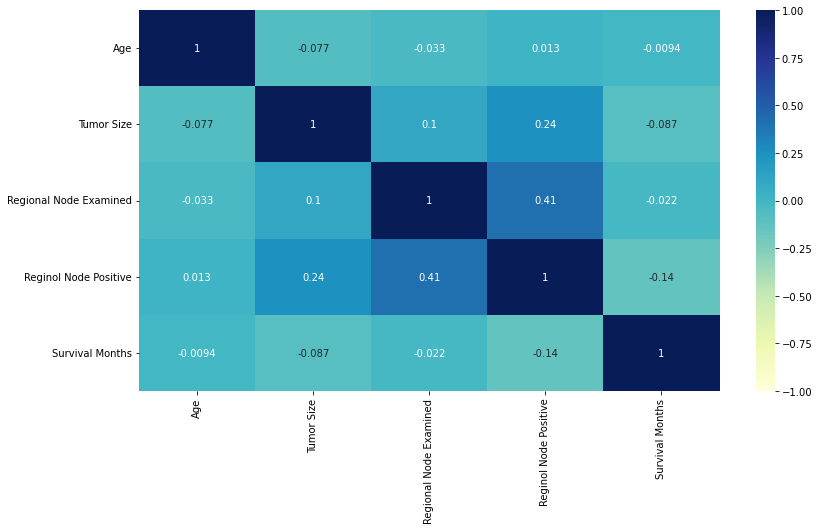

In [17]:
# correlación:

plt.figure(figsize= (13,7))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True, vmin = -1, vmax = 1);

Aparentemente puede haber una relación moderada entre el node examinado y su resultado positivo. Podría ser indicativo de acierto de diagnostico ocasionalmente. 

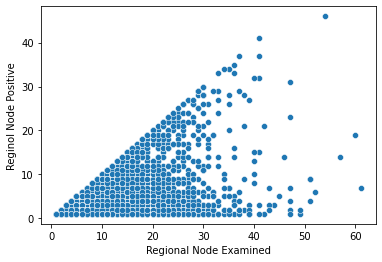

In [18]:
# vemos ésta más a fondo:

sns.scatterplot(x= "Regional Node Examined", y= "Reginol Node Positive", data=df);

La gráfica nos muestra que, en esta muestra de datos, cuanto más nudos se examinan, menos positivos aparecen. 

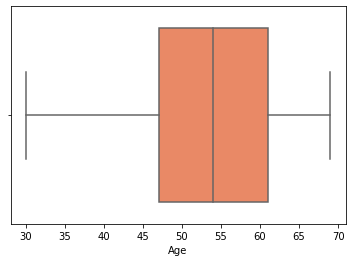

In [22]:
# relación sobre el valor edad:

sns.boxplot(data=df, x= "Age", color="coral");

Podemos indicar que la mediana de edad de los pacientes rondaría los 54 años. 
No se observa ningun valor atípico.

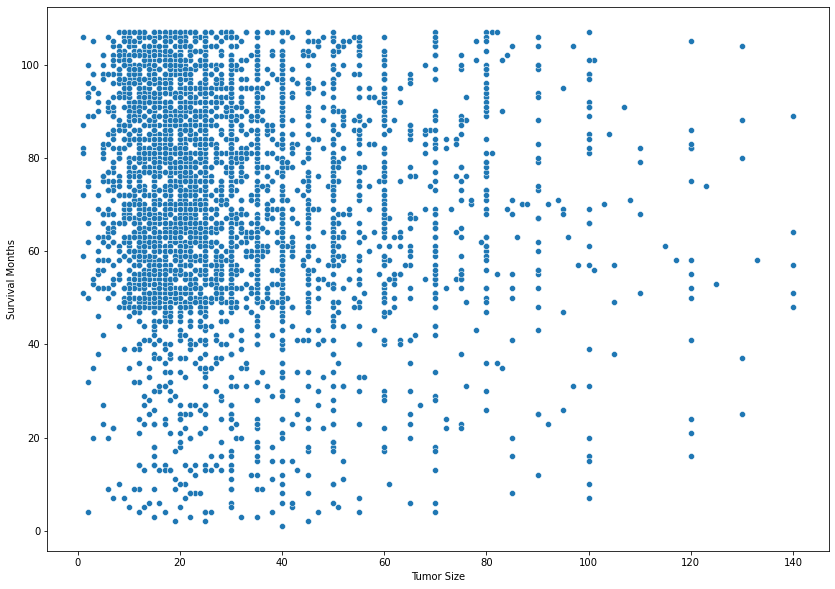

In [24]:
# realación entre el tamaño del tumor y los meses de supervivencia:

plt.figure(figsize=(14,10))
sns.scatterplot(x= "Tumor Size", y= "Survival Months", data=df);

Parece haber una tendencia hacia una mayor supervivencia cuando los tumores son de un tamaño más pequeño pero la gráfica nos muestra una dispersión importante y, con ello, unos datos demasiado heterogéneos. 

/home/ana/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ana/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ana/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ana/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ana/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarni

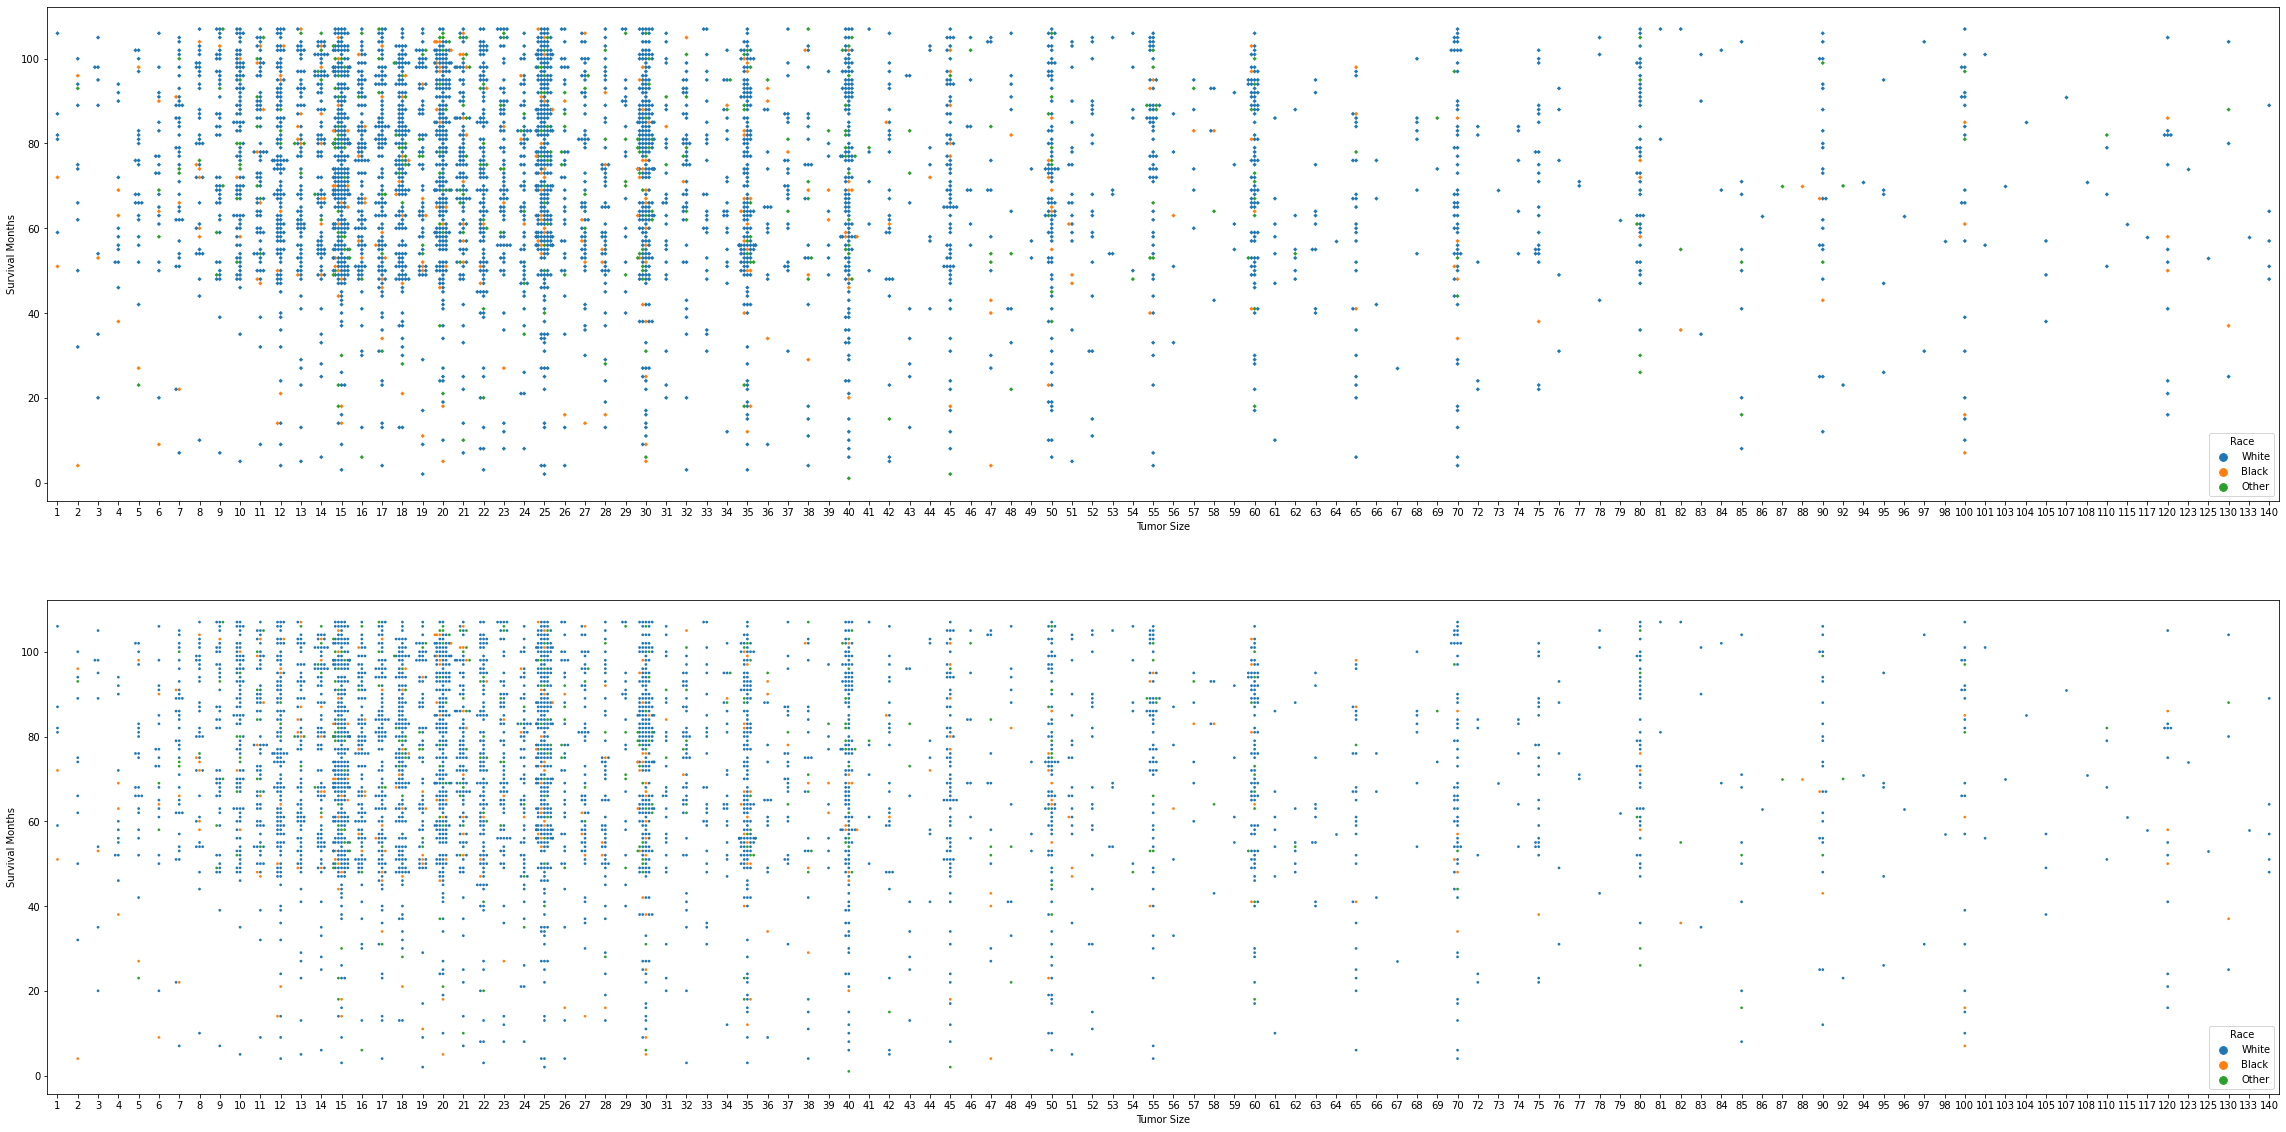

In [30]:
# relación entre la raza, supervivencia y el tamaño del tumor:

fig, axes = plt.subplots(2,1, figsize = (40,20))

sns.swarmplot(x= "Tumor Size", y= "Survival Months", data= df, hue= "Race", marker= "D", s= 3, ax= axes[0])
sns.swarmplot(x= "Tumor Size", y= "Survival Months", data= df, hue= "Race", marker= "h", s= 3,ax= axes[1]);

In [34]:
# Como no se lee correctamente, vamos a categorizar el tamaño del tumor en 4 intervalos:

print (df["Tumor Size"].max())
print (df["Tumor Size"].min())
print (df["Tumor Size"]. median())

df["Tumor_cat"]= pd.cut(x=df['Tumor Size'], bins=[0, 25, 50,75, 100,125, 150])

140
1
25.0


In [37]:
print (df["Survival Months"].max())
print (df["Survival Months"].min())
print (df["Survival Months"]. median())

df["SM_cat"]= pd.cut(x=df['Survival Months'], bins=[0, 12, 24, 36, 48, 60, 72, 84, 96, 108])

107
1
73.0


In [40]:
pd.crosstab(df["SM_cat"], df["Tumor_cat"])

Tumor_cat,"(0, 25]","(25, 50]","(50, 75]","(75, 100]","(100, 125]","(125, 150]"
SM_cat,,,,,,
"(0, 12]",31,28,8,4,0,0
"(12, 24]",44,47,14,6,3,0
"(24, 36]",48,41,16,11,0,1
"(36, 48]",115,72,27,7,2,2
"(48, 60]",410,224,72,20,10,3
"(60, 72]",414,208,67,31,4,1
"(72, 84]",424,218,61,19,8,1
"(84, 96]",382,190,77,20,3,2
"(96, 108]",390,158,51,26,2,1
